# Исследование надёжности заёмщиков

**Описание проекта**

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

<h1>План работы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-и-начало-работы" data-toc-modified-id="Импорт-и-начало-работы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт и начало работы</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропущенных-значений" data-toc-modified-id="Обработка-пропущенных-значений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропущенных значений</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Есть-ли-зависимость-между-наличием-детей-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-наличием-детей-и-возвратом-кредита-в-срок?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Есть ли зависимость между наличием детей и возвратом кредита в срок?</a></span></li><li><span><a href="#Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Есть ли зависимость между семейным положением и возвратом кредита в срок?</a></span></li><li><span><a href="#Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Есть ли зависимость между уровнем дохода и возвратом кредита в срок?</a></span></li><li><span><a href="#Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?" data-toc-modified-id="Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Как разные цели кредита влияют на его возврат в срок?</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Импорт и начало работы

**Импорт библиотек**

In [1]:
# библиотека для обработки и анализа табличных данных
import pandas as pd

# библиотеки для визуализации данных (для гистограмм и тепловой карты)
import matplotlib.pyplot as plt
import seaborn as sns

# счетчик слов для списка лемм
from collections import Counter

# библиотека для лемматизации
from pymystem3 import Mystem
m = Mystem()

Прочитаем файл `data.csv` и сохраним его в переменной `df`.

In [2]:
path = '/datasets/'
df = pd.read_csv(path + 'data.csv')

Выведем первые 10 строк таблицы.

In [3]:
display(df.head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Общая информация о данных в `df`**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Тепловая карта пропущенных значений**

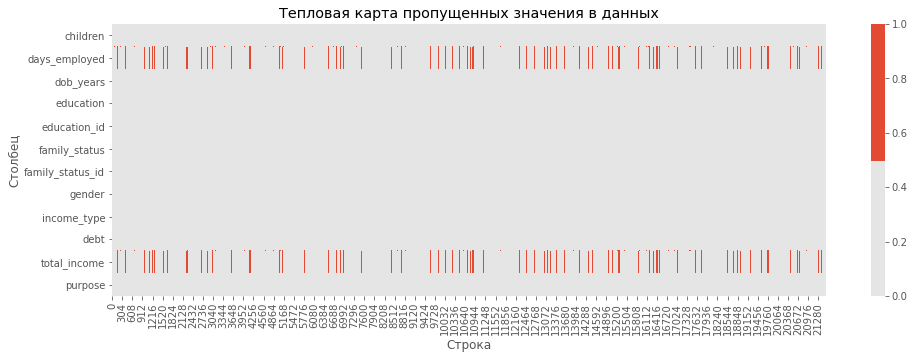

In [5]:
# зададим стиль эмулирующий ggplot (популярный пакет для построения графиков для R)
plt.style.use('ggplot')

# зададим единый размер графиков в проекте
plt.rcParams['figure.figsize'] = (16, 5)

# определим цвета в стиле ggplot
# красный - пропущенные данные, серый - не пропущенные
colours = ['#e5e5e5', '#e24a33']
sns.heatmap(df.isnull().T, cmap=colours)

# добавим заголовок и названия осей
plt.title('Тепловая карта пропущенных значения в данных')
plt.xlabel('Строка')
plt.ylabel('Столбец')

# выведем график
plt.show()

Рассмотрим полученную информацию подробнее.

Всего в таблице 12 столбцов c типами данных – ***float64***, ***int64*** и ***object***.

Подробно разберём, какие в `df` столбцы и какую информацию они содержат:

* __children__ — количество детей в семье;
* __days_employed__ — общий трудовой стаж в днях;
* __dob_years__ — возраст клиента в годах;
* __education__ — уровень образования клиента;
* __education_id__ — идентификатор уровня образования;
* __family_status__ — семейное положение;
* __family_status_id__ — идентификатор семейного положения;
* __gender__ — пол клиента;
* __income_type__ — тип занятости;
* __debt__ — имел ли задолженность по возврату кредитов;
* __total_income__ — ежемесячный доход;
* __purpose__ — цель получения кредита.

В столбцах `days_employed` и `total_income` меньше значений (19351 из 21525), значит в данных есть пропуски о зарплатах и трудовом стаже. 

**Существующие категории**

Посмотрим как категоризированы данные в `education_id`, какие **id** чему соответствуют. Приведём значения в `education` к единому виду.

In [6]:
# приведём значения в education к нижнему регистру
df['education'] = df['education'].str.lower()

# выведем на экран уникальные значения столбца
display(df
        .pivot_table(index=['education'], values='education_id')
        .sort_values(by='education_id')
        .reset_index().set_index('education_id'))

,education
education_id,
0,высшее
1,среднее
2,неоконченное высшее
3,начальное
4,ученая степень


Посмотрим как категоризированы данные в `family_status`.

In [7]:
# выведем на экран уникальные значения столбца
display(df
        .pivot_table(index=['family_status'], values='family_status_id')
        .sort_values(by='family_status_id')
        .reset_index().set_index('family_status_id'))

,family_status
family_status_id,
0,женат / замужем
1,гражданский брак
2,вдовец / вдова
3,в разводе
4,Не женат / не замужем


**Аномалии и скрытые пропуски в данных**

In [8]:
def data_unique(column):
    return sorted(df[column].unique())


data = ['children', 'dob_years', 'gender', 'debt', 'purpose']

for item in data:
    print(item + ':', data_unique(item), '\n')

children: [-1, 0, 1, 2, 3, 4, 5, 20] 

dob_years: [0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75] 

gender: ['F', 'M', 'XNA'] 

debt: [0, 1] 

purpose: ['автомобили', 'автомобиль', 'высшее образование', 'дополнительное образование', 'жилье', 'заняться высшим образованием', 'заняться образованием', 'на покупку автомобиля', 'на покупку подержанного автомобиля', 'на покупку своего автомобиля', 'на проведение свадьбы', 'недвижимость', 'образование', 'операции с жильем', 'операции с коммерческой недвижимостью', 'операции с недвижимостью', 'операции со своей недвижимостью', 'покупка жилой недвижимости', 'покупка жилья', 'покупка жилья для сдачи', 'покупка жилья для семьи', 'покупка коммерческой недвижимости', 'покупка недвижимости', 'покупка своего жилья', 'получение высшего образования', 'получение дополнитель

**Вывод**

Каждая строка таблицы содержит подробную информацию об одном клиенте банка. Проблемы на которые стоит обратить внимание:

* плейсхолдер `-1` и аномалия `20` в `children`;
* плейсхолдеры `0` в `dob_years`, и `XNA` в `gender`;
* парные пропуски значений в `days_employed` и `total_income`;
* подозрительно высокие значения в `days_employed` (например: id=4, days_employed=340266.072047 – это 932 года);
* подозрительно высокие значения в `total_income` (например: id=4, income_type=пенсионер, total_income=158616.077870);
* множество вариантов описания одной цели в `purpose` (например: "сыграть свадьбу" и "на проведение свадьбы").

Вопросы на которые предстоит ответить:

* Есть ли зависимость между _наличием детей_ и возвратом кредита в срок?
* Есть ли зависимость между _семейным положением_ и возвратом кредита в срок?
* Есть ли зависимость между _уровнем дохода_ и возвратом кредита в срок?
* Как разные _цели кредита_ влияют на его возврат в срок?


Для ответа на эти вопросы понадобятся данные из столбцов `children`, `family_status_id`, `total_income`, `purpose` и `debt`.

## Предобработка данных

### Обработка пропущенных значений

Мы обнаружили пропуски в `days_employed` и `total_income`, аномалии и плейсхолдеры в `children`, `dob_years` и `gender`.

**Обработка children**

Предположим, что `-1` – это плейсхолдер для отсутствующего значения, а `20` – это ошибка. В контексте поставленной задачи нам интересно наличие детей, а не их количество. Поэтому ошибку оставим как есть и посмотрим как часто встречается плейсхолдер относительно всего объема данных.

In [9]:
# посчитаем количество значений -1 в children
df_children_placeholder_cnt = df[df['children'] == -1]['children'].count()

# посчитаем общее количество записей
df_children_cnt = df['children'].count()

# выведем результат
print("Всего {} строк с плейсхолдером, {:.2%} от общего объёма."
      .format(df_children_placeholder_cnt, df_children_placeholder_cnt / df_children_cnt))

Всего 47 строк с плейсхолдером, 0.22% от общего объёма.


Меньше четверти процента от объема. Удалим эти строки из данных.

In [10]:
# оставим в данных только те строки, в которых значение children не равно -1
df = df[df['children'] != -1]

# проверим результат
print(data_unique('children'))

[0, 1, 2, 3, 4, 5, 20]


**Наблюдение по days_employed**

Тепловая карта показала, что значения признака пропущены попарно с `days_employed` во всём объеме данных. Проверим.

In [11]:
print("Всего пропущенных строк в days_employed:",
      df[df['days_employed'].isnull()].shape[0])

print("Всего пропущенных строк в total_income:",
      df[df['total_income'].isnull()].shape[0])

print("Перекрестных совпадений:",
      df[df['total_income'].isnull() & df['days_employed'].isnull()].shape[0])

Всего пропущенных строк в days_employed: 2171
Всего пропущенных строк в total_income: 2171
Перекрестных совпадений: 2171


Предположим, что пропуски возникли по технологическим причинам, например в результате ошибки выгрузки. Информацию об этом передадим разработчикам, ответственным за выгрузку данных.

**Обработка total_income**

Уровень ежемесячного дохода может зависеть от множества факторов. Для заполнения пропусков в `total_income` возьмем три: **тип занятости**, **уровень образования** и **пол клиента**.

Посмотрим какие `income_type` у нас есть.

In [12]:
display(df.groupby('income_type').count())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,debt,total_income,purpose
income_type,,,,,,,,,,,
безработный,2,2,2,2,2,2,2,2,2,2,2
в декрете,1,1,1,1,1,1,1,1,1,1,1
госслужащий,1455,1308,1455,1455,1455,1455,1455,1455,1455,1308,1455
компаньон,5076,4569,5076,5076,5076,5076,5076,5076,5076,4569,5076
пенсионер,3848,3436,3848,3848,3848,3848,3848,3848,3848,3436,3848
предприниматель,2,1,2,2,2,2,2,2,2,1,2
сотрудник,11093,9989,11093,11093,11093,11093,11093,11093,11093,9989,11093
студент,1,1,1,1,1,1,1,1,1,1,1


Всего по 1-2 записи в категориях **безработный**, **в декрете**, **предприниматель** и **студент**. Из такого малого количества наблюдений делать специфические выводы нельзя. Убираем их из данных, чтобы они нас не отвлекали и не усложняли задачу.

In [13]:
df = df[(df.income_type != 'безработный') & (df.income_type != 'в декрете') &
        (df.income_type != 'предприниматель') & (df.income_type != 'студент')]

Проверим результат.

In [14]:
display(df.groupby('income_type').count())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,debt,total_income,purpose
income_type,,,,,,,,,,,
госслужащий,1455,1308,1455,1455,1455,1455,1455,1455,1455,1308,1455
компаньон,5076,4569,5076,5076,5076,5076,5076,5076,5076,4569,5076
пенсионер,3848,3436,3848,3848,3848,3848,3848,3848,3848,3436,3848
сотрудник,11093,9989,11093,11093,11093,11093,11093,11093,11093,9989,11093


Посмотрим распределение в `total_income`.

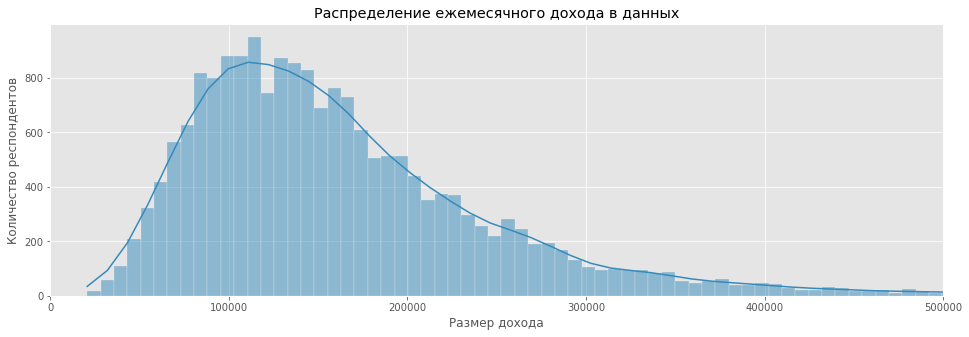

In [15]:
# выберем не отсутствующие значения столбца total_income в качестве данных для оси Х
x = df[df['total_income'].notna()]['total_income']
sns.histplot(x, kde=True)

# добавим заголовок и названия осей
plt.title('Распределение ежемесячного дохода в данных')
plt.xlabel('Размер дохода')
plt.ylabel('Количество респондентов')

# зададим ограничение по оси Х, чтобы график не уезжал влево из-за наличия хвоста
plt.xlim(0, 5e5)

# выведем график
plt.show()

Распределение имеет длинный хвост вправо с очень высокими значениями, поэтому для заполнения пропусков используем _медиану_. Расчитаем медианный ежемесячный доход с учетом **типа занятости**, **уровня образования** и **пола**.

In [16]:
# округлим значения total_income, чтобы было проще на них смотреть
df['total_income'] = df['total_income'].round()

# выведем сводную таблицу на основе имеющихся данных
display(df.pivot_table(index=['gender', 'income_type'], columns='education',
                       values='total_income', aggfunc='median'))

education             высшее  начальное  неоконченное высшее   среднее  \
gender income_type                                                       
F      госслужащий  157841.0    89619.0             136599.0  125647.0   
       компаньон    189893.5   134012.0             170471.5  144853.0   
       пенсионер    142307.0   101180.5             116593.0  112923.0   
       сотрудник    153724.0   118517.0             134925.0  123969.0   
M      госслужащий  213874.0   190966.5             177320.5  169652.0   
       компаньон    233065.0   150101.0             191292.0  181889.0   
       пенсионер    157457.0   113124.0             124667.0  125319.0   
       сотрудник    192580.0   141637.5             187361.0  156312.5   
XNA    компаньон         NaN        NaN             203905.0       NaN   

education           ученая степень  
gender income_type                  
F      госслужащий        111392.0  
       компаньон               NaN  
       пенсионер          255425.0  
       сотрудник               NaN  
M      госслужащий             NaN  
       компаньон               NaN  
       пенсионер           98752.0  
       сотрудник          198571.0  
XNA    компаньон               NaN

В сводной таблице мы видим, что доход ***компаньона с неоконченным высшим*** ближе к мужскому полу. Присвоим этой записи мужской пол.

In [17]:
df.loc[(df['gender'] == 'XNA'), 'gender'] = 'M'

Заполним пропуски.

In [18]:
df['total_income'].fillna(df.groupby(['gender', 'education', 'income_type'])['total_income']
                          .transform('median'), inplace=True)

Посмотрим на результат.

In [19]:
# выведем сводную таблицу на основе имеющихся данных
display(df
        .pivot_table(index=['gender', 'income_type'], columns='education',
                     values='total_income', aggfunc='median'))

education             высшее  начальное  неоконченное высшее   среднее  \
gender income_type                                                       
F      госслужащий  157841.0    89619.0             136599.0  125647.0   
       компаньон    189893.5   134012.0             170471.5  144853.0   
       пенсионер    142307.0   101180.5             116593.0  112923.0   
       сотрудник    153724.0   118517.0             134925.0  123969.0   
M      госслужащий  213874.0   190966.5             177320.5  169652.0   
       компаньон    233065.0   150101.0             193535.0  181889.0   
       пенсионер    157457.0   113124.0             124667.0  125319.0   
       сотрудник    192580.0   141637.5             187361.0  156312.5   

education           ученая степень  
gender income_type                  
F      госслужащий        111392.0  
       компаньон               NaN  
       пенсионер          255425.0  
       сотрудник               NaN  
M      госслужащий             NaN  
       компаньон               NaN  
       пенсионер           98752.0  
       сотрудник          198571.0

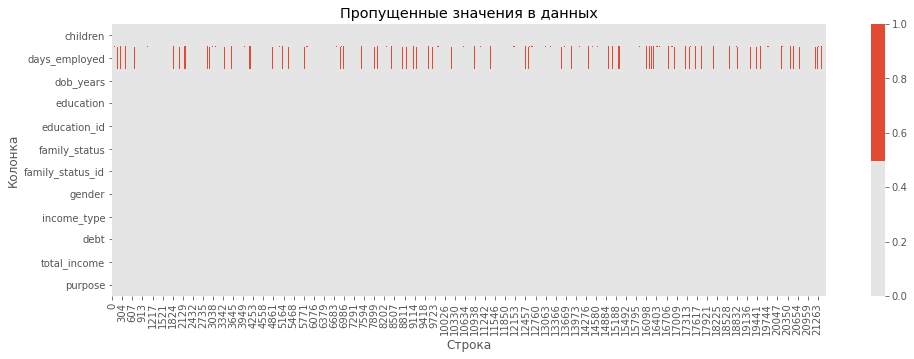

In [20]:
# выберем все значения df в качестве данных для тепловой карты
sns.heatmap(df.isnull().T, cmap=colours)

# добавим заголовок и названия осей
plt.title('Пропущенные значения в данных')
plt.xlabel('Строка')
plt.ylabel('Колонка')

# выведем график
plt.show()

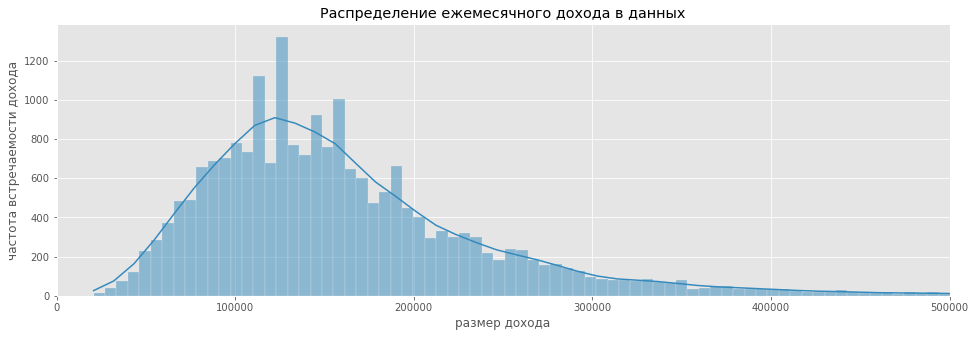

In [21]:
# выберем значения столбца total_income в качестве данных для оси Х
sns.histplot(df['total_income'], kde=True)

# добавим заголовок и названия осей
plt.title('Распределение ежемесячного дохода в данных')
plt.xlabel('размер дохода')
plt.ylabel('частота встречаемости дохода')

# зададим ограничение по оси Х, чтобы график не уезжал влево из-за наличия хвоста
plt.xlim(0, 5e5)

# выведем график
plt.show()

Пропуски в `total_income` исчезли, медианные цифры не изменились, значит замена прошла успешна. Заполнив пропуски медианным значением мы также нарушили нормальное распределение признака. В контексте поставленной задачи это несущественно, но стоит иметь в виду.

**Вывод**

Мы устранили пропуски в `children`, `total_income` и `gender`. У нас не было адекватного способа восстановить данные в 47 строках `children`, поэтому мы решили их удалить. C `total_income` и `gender` нам повезло чуть больше и мы смогли заполнить пропуски медианным значением на основе остальных данных. Мы обратимся к разработчикам, ответственным за выгрузку данных, тогда возможно мы сможем узнать больше о природе пропусков и будем действовать с большим знанием дела в будущем.

### Замена типа данных

Теперь, когда больше нет пропусков в `total_income`, то мы можем методом **astype()** заменить тип данных с вещественного на целочисленный.

In [22]:
df['total_income'] = df['total_income'].astype('int')

### Обработка дубликатов

Взглянем на полные дубликаты строк и их количество.

In [23]:
display(df[df.duplicated()].head(10))
print("Количество полностью дублирующихся строк в данных:",  df[df.duplicated()]['total_income'].shape[0])

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,NaN,41,среднее,1,женат / замужем,0,F,сотрудник,0,123969,покупка жилья для семьи
3290,0,NaN,58,среднее,1,гражданский брак,1,F,пенсионер,0,112923,сыграть свадьбу
4182,1,NaN,34,высшее,0,гражданский брак,1,F,сотрудник,0,153724,свадьба
4851,0,NaN,60,среднее,1,гражданский брак,1,F,пенсионер,0,112923,свадьба
5557,0,NaN,58,среднее,1,гражданский брак,1,F,пенсионер,0,112923,сыграть свадьбу
6312,0,NaN,30,среднее,1,женат / замужем,0,M,сотрудник,0,156312,строительство жилой недвижимости
7808,0,NaN,57,среднее,1,гражданский брак,1,F,пенсионер,0,112923,на проведение свадьбы
7921,0,NaN,64,высшее,0,гражданский брак,1,F,пенсионер,0,142307,на проведение свадьбы
7938,0,NaN,71,среднее,1,гражданский брак,1,F,пенсионер,0,112923,на проведение свадьбы
8583,0,NaN,58,высшее,0,Не женат / не замужем,4,F,пенсионер,0,142307,дополнительное образование


Количество полностью дублирующихся строк в данных: 71


**Вывод**

Мы не будем удалять полные дубликаты строк, потому что высока вероятность, что это они получились случайно. Получить 71 идентичную строку со значениями **NaN** в `days_employed` и `total_income` на таком объеме не сложно. Зато мы всё еще можем использовать эти строки для ответа на ключевые вопросы проекта.

### Лемматизация

In [24]:
# сформируем массив с уникальными целями
purpose_list = df['purpose'].unique()

# создадим список для хранения лемм
lemma_list = list()

# для каждой цели в массиве
for goal in purpose_list:

    # для каждого слова в разбитой на слова цели
    for word in goal.split():

        # если это слово длинее 3 символов
        if len(word) > 3:

            # добавим лемму в список лемм
            lemma_list += [m.lemmatize(word)[0]]

# выведем 10 самых популярных лемм
display(Counter(lemma_list).most_common(10))

[('покупка', 10),
 ('недвижимость', 10),
 ('автомобиль', 9),
 ('образование', 9),
 ('жилье', 7),
 ('операция', 4),
 ('свой', 4),
 ('свадьба', 3),
 ('строительство', 3),
 ('получение', 3)]

**Вывод**

Мы применили лемматизацию и смогли выделить из облака целей кредита четыре большие категории:

* недвижимость (жильё, строительство)
* автомобиль
* образование
* свадьба

__** слово операция используется в контексте недвижимости, а не здоровья.__

Используем это знание для категоризации.

### Категоризация данных

**Категоризация children**

Разделим клиентов на две совокупности: с детьми и без. Проставим соответствующий признак в новом столбце `has_children`.

In [25]:
# создадим новый столбец в df и заполним его с использованием анонимной функции
df['has_children'] = df['children'].apply(lambda children: False if children == 0 else True)

# посмотрим на результат
display(df[['children', 'has_children']].head())

,children,has_children
0,1,True
1,1,True
2,0,False
3,3,True
4,0,False


**Категоризация total_income**

Для упрощения анализа сгруппируем доход по группам. Группы определим путем деления совокупности по квантилям.

In [26]:
# именуем категории
labels = ['низкий', 'ниже среднего', 'средний',
          'выше среднего', 'высокий']

# разделим доходы на 5 категорий согласно именованию, создадим новый столбец в df и заполним его
df['total_income_cat'] = pd.qcut(df.total_income, 5, labels=labels)

# посмотрим на результат
display(df[['total_income', 'total_income_cat']].head(5).sort_values(by='total_income'))

,total_income,total_income_cat
1,112080,ниже среднего
2,145886,средний
4,158616,средний
0,253876,высокий
3,267629,высокий


**Категоризация purpose**

Присвоим каждой из четырех выявленных целей свою категорию.

In [27]:
# заведем словарь со значением будущих категории для каждой леммы
purpose_id_dict = dict(
    недвижимость = 'недвижимость',
    жилье = 'недвижимость',
    автомобиль = 'автомобиль',
    образование = 'образование',
    свадьба = 'свадьба')

# завведем и заполним финальный словарь для хранения целей и их категорий
purpose_dict = dict()

for goal in purpose_list:
    lemmas = m.lemmatize(goal)
    
    for pid in purpose_id_dict.keys():
        if pid in lemmas:
            purpose_dict.update({goal: purpose_id_dict[pid]})

# создадим новый столбец в df и заполним его с помощью анонимной функции
df['purpose_id'] = df['purpose'].apply(lambda x: purpose_dict[x])

# посмотрим на результат
display(df[['purpose', 'purpose_id']].head(10))

,purpose,purpose_id
0,покупка жилья,недвижимость
1,приобретение автомобиля,автомобиль
2,покупка жилья,недвижимость
3,дополнительное образование,образование
4,сыграть свадьбу,свадьба
5,покупка жилья,недвижимость
6,операции с жильем,недвижимость
7,образование,образование
8,на проведение свадьбы,свадьба
9,покупка жилья для семьи,недвижимость


**Вывод**

Теперь, когда объекты в `children`, `total_income` и `purpose` поделены на категории, то можно переходить к анализу.

## Анализ

Инициализируем функцию, которая будет строить сводную таблицу с частотой задолженности для выбранного признака (столбца).

In [28]:
def debt_ratio(column):
    # заведем сводную таблицу для выбранного признака (столбца)
    pivot = df.pivot_table(index=column, columns='debt',
                           values='total_income', aggfunc='count')

    # заменим названия столбцов для удобства
    pivot.columns = ['no_debt', 'debt']

    # посчитаем соотношение клиентов с задолженностью к клиентам без задолженности, округлим до сотых
    ratio = pivot.debt / pivot.no_debt
    pivot['ratio'] = round(ratio, 2)

    # отдадим результат отсортированный по соотношению
    return display(pivot.sort_values(by='ratio'))

### Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [29]:
debt_ratio('has_children')

,no_debt,debt,ratio
has_children,,,
False,13082,1063,0.08
True,6652,675,0.10


**Вывод**

Задолженность по возврату кредита встречается на 2% чаще среди клиентов с детьми (10% против 8%).

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [30]:
debt_ratio('family_status')

,no_debt,debt,ratio
family_status,,,
вдовец / вдова,893,63,0.07
в разводе,1106,85,0.08
женат / замужем,11420,928,0.08
гражданский брак,3782,388,0.10
Не женат / не замужем,2533,274,0.11


In [31]:
display(df
        .pivot_table(index='family_status', values='dob_years', aggfunc='median')
        .sort_values(by='dob_years', ascending=False))

,dob_years
family_status,
вдовец / вдова,58
в разводе,46
женат / замужем,43
гражданский брак,41
Не женат / не замужем,36


**Вывод**

Может показаться, что самые надежные заемщики – это вдовцы и вдовы, ведь по статистике задолженность встречается только у 7% таких клиентов, а самые ненадежные – клиенты не состоящие даже в гражданском браке, так как среди них встречается до 11% случаев задолженности.

Однако, если дополнительно взглянуть на возвраст заемщиков, то окажется что семейное положение имеет прямую корреляцию с медианным возрастом. Таким образом, цифры демонстрируют лишь косвенную зависимость между семейным положением и возвратом кредита в срок. Вероятнее, что основной причиной роста процента случаев задолженности будет являться более молодой возраст.

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [32]:
display(debt_ratio('total_income_cat'))

,no_debt,debt,ratio
total_income_cat,,,
высокий,3994,301,0.08
низкий,3952,343,0.09
ниже среднего,3937,357,0.09
выше среднего,3933,361,0.09
средний,3918,376,0.10


None

**Вывод**

Клиенты с высоким доходом задерживают выплату кредита в 8% случаев, клиенты со средним доходом в 10% случаев, и все остальные в 9% случаев.

### Как разные цели кредита влияют на его возврат в срок?

In [33]:
debt_ratio('purpose_id')

,no_debt,debt,ratio
purpose_id,,,
недвижимость,10031,781,0.08
свадьба,2159,186,0.09
автомобиль,3902,401,0.10
образование,3642,370,0.10


**Вывод**

Задолженность по кредиту на недвижимость встречается реже других – всего в 8% случаев. По кредиту на свадьбу – на 1% чаще, по авто- и образовательному кредитам на 2% чаще.

## Общий вывод

Вероятность просрочки кредита будет ниже у клиентов без детей, более старшего возраста, с высоким доходом, берущих кредит на недвижимость. Риск задолженности находится в обратной зависимости от возраста заемщика, т.е. чем меньше возраст – тем выше риск. Риск также увеличивается для заемщиков с детьми, а также для клиентов чьей целью кредита является покупка авто или оплата образования.

Что касается уровеня дохода, здесь ависимость имеет нелинейный характер. Так риск наиболее высок для заемщиков со средним уровнем дохода, и ниже для клиентов с доходом выше и ниже среднего.